# Voting Classifier

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

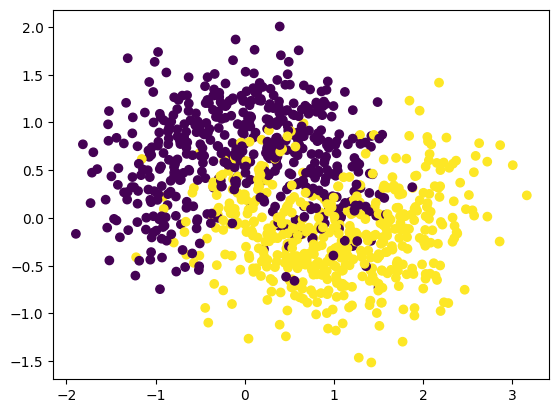

In [2]:
X, y = make_moons(1000, noise=0.4, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(random_state=42)
svc_proba = SVC(random_state=42, probability=True)

In [5]:
from sklearn.ensemble import VotingClassifier

hard_vot = VotingClassifier(
    [
        ('rf', rf),
        ('lr', lr),
        ('knn', knn),
        ('svc', svc)
    ],
    voting='hard'
)

soft_vot = VotingClassifier(
    [
        ('rf', rf),
        ('lr', lr),
        ('knn', knn),
        ('svc', svc_proba)
    ],
    voting='soft'
)

In [6]:
classifiers = [
    ('svc', svc),
    ('rf', rf),
    ('lr', lr),
    ('knn', knn),
    ('hard_vot', hard_vot),
    ('soft_vot', soft_vot)
]

accuracy_scores = {}

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc

In [7]:
print('Higgest Accuracies:')
pd.DataFrame(accuracy_scores, index=['accuracy']).T.sort_values(by='accuracy', ascending=False)

Higgest Accuracies:


,accuracy
hard_vot,0.860
svc,0.855
soft_vot,0.855
knn,0.850
rf,0.840
lr,0.820


# Bagging & Pasting

In [8]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [9]:
bootstrap = True

if bootstrap:
    print('Using Bagging')
else:
    print('Using Pasting')

bagg_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=100,
    bootstrap=bootstrap,
    n_jobs=-1  # número de núcleos de CPU a serem usados
)

Using Bagging


In [10]:
bagg_clf.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,500
,max_samples,100
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,None
,verbose,0


In [11]:
y_pred = bagg_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       100
           1       0.87      0.84      0.85       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



In [12]:
accuracy_score(y_test, y_pred)

0.855

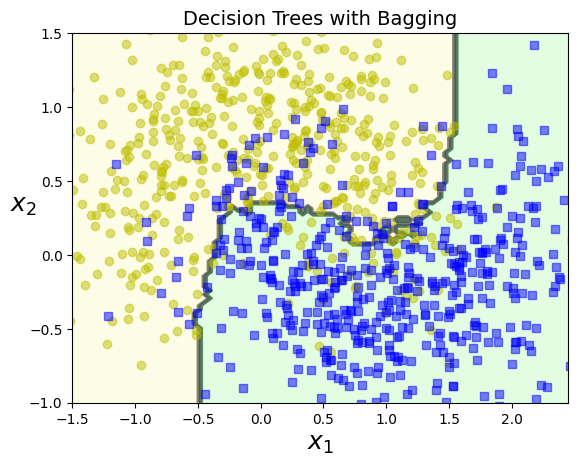

In [13]:
# Code from Aurélien Géron

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.title("Decision Trees with Bagging", fontsize=14)
plot_decision_boundary(bagg_clf, X, y)
plt.show()